In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data= train_data.drop('id',axis=1)
print(train_data.info())
#there is no null value row in this train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cat10   300000 non-null  object 
 11  cat11   300000 non-null  object 
 12  cat12   300000 non-null  object 
 13  cat13   300000 non-null  object 
 14  cat14   300000 non-null  object 
 15  cat15   300000 non-null  object 
 16  cat16   300000 non-null  object 
 17  cat17   300000 non-null  object 
 18  cat18   300000 non-null  object 
 19  cont0   300000 non-null  float64
 20  cont1   300000 non-null  float64
 21  cont2   30

In [4]:
# Simple encoding Catagorical values
Label_Encoder = LabelEncoder()
columns = [i for i in train_data.columns if train_data[i].dtype]
train_data[columns] = train_data[columns].apply(LabelEncoder().fit_transform)

In [5]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   cat0    300000 non-null  int64
 1   cat1    300000 non-null  int64
 2   cat2    300000 non-null  int64
 3   cat3    300000 non-null  int64
 4   cat4    300000 non-null  int64
 5   cat5    300000 non-null  int64
 6   cat6    300000 non-null  int64
 7   cat7    300000 non-null  int64
 8   cat8    300000 non-null  int64
 9   cat9    300000 non-null  int64
 10  cat10   300000 non-null  int64
 11  cat11   300000 non-null  int64
 12  cat12   300000 non-null  int64
 13  cat13   300000 non-null  int64
 14  cat14   300000 non-null  int64
 15  cat15   300000 non-null  int64
 16  cat16   300000 non-null  int64
 17  cat17   300000 non-null  int64
 18  cat18   300000 non-null  int64
 19  cont0   300000 non-null  int64
 20  cont1   300000 non-null  int64
 21  cont2   300000 non-null  int64
 22  cont3   300000 non-n

In [6]:
# Standard scaling
X = train_data.drop('target',axis=1)
Y = train_data['target']
Standard_Scaler = StandardScaler()
Standard_Scaler.fit(X)
X_Standard = Standard_Scaler.fit_transform(X)
print(X_Standard)

[[-0.5849203  -0.03985428 -0.63495693 ...  1.53527194  1.70100252
   1.10210229]
 [-0.5849203  -0.03985428 -0.63495693 ... -0.10328085  1.6380739
   0.34190269]
 [-0.5849203   0.61135943 -0.63495693 ...  0.01100965 -1.05673135
   0.80838828]
 ...
 [-0.5849203  -0.69106799  2.26617448 ... -0.5260702   0.50042564
   0.0624342 ]
 [ 1.70963464 -0.36546113 -0.63495693 ...  1.11468937 -0.75448451
  -1.03109648]
 [-0.5849203  -1.01667485 -0.15143503 ...  1.54707995 -0.58870046
   1.69641621]]


In [7]:
pca = PCA(0.95)
pca.fit(X_Standard)
X = pca.transform(X_Standard)
print(X)

[[-3.77433534 -1.04176694 -0.43010367 ... -0.33431947 -0.06171884
   0.61561058]
 [ 0.53272981  0.45975412  0.65946218 ...  0.92926046  0.36218061
   0.85478234]
 [ 0.48351012 -2.81731424 -0.00777292 ...  0.19756268 -0.03356849
   0.12760817]
 ...
 [ 1.12874842  4.46604654  0.20646657 ...  1.25536577 -0.21848066
  -0.29456594]
 [-0.36786944 -0.61387248  0.98334318 ... -2.0929861   1.60414522
   0.83000995]
 [-4.14661446 -0.9991506  -1.62841783 ... -0.65892591 -0.18361895
  -0.0934166 ]]


In [8]:
model_LR = LogisticRegression(C=1,solver='liblinear')
model_LR.fit(X,Y)
print('Score = ',model_LR.score(X,Y))

Score =  0.8367433333333333


In [9]:
predict = model_LR.predict(X)
print(classification_report(Y,predict))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89    220539
           1       0.74      0.59      0.66     79461

    accuracy                           0.84    300000
   macro avg       0.80      0.76      0.77    300000
weighted avg       0.83      0.84      0.83    300000



In [10]:
confusion_matrix_y_train = confusion_matrix(Y,predict)

Confusion Matrix :
  [[204505  16034]
 [ 32943  46518]]


/home/rakib/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ROC AUC Score: 0.7563577840742061


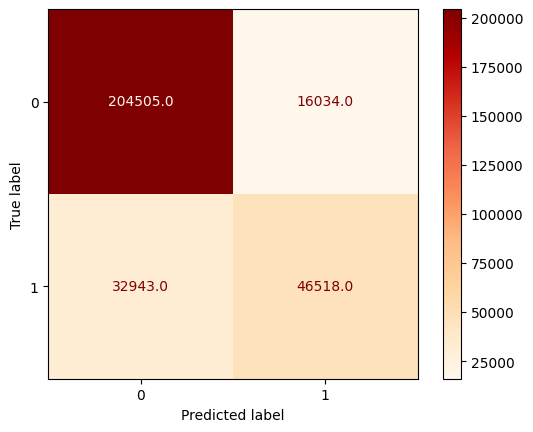

In [11]:
print('Confusion Matrix :\n ',confusion_matrix_y_train)
plot_confusion_matrix(model_LR, X, Y, cmap='OrRd', values_format = '.1f')
roc = roc_auc_score(Y, predict)
print('ROC AUC Score:',roc)

In [12]:
test_data = pd.read_csv('test.csv')

In [13]:
ID= test_data['id']
test_data= test_data.drop('id',axis=1)
print(test_data.info())
#there is no null value row in this train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    200000 non-null  object 
 1   cat1    200000 non-null  object 
 2   cat2    200000 non-null  object 
 3   cat3    200000 non-null  object 
 4   cat4    200000 non-null  object 
 5   cat5    200000 non-null  object 
 6   cat6    200000 non-null  object 
 7   cat7    200000 non-null  object 
 8   cat8    200000 non-null  object 
 9   cat9    200000 non-null  object 
 10  cat10   200000 non-null  object 
 11  cat11   200000 non-null  object 
 12  cat12   200000 non-null  object 
 13  cat13   200000 non-null  object 
 14  cat14   200000 non-null  object 
 15  cat15   200000 non-null  object 
 16  cat16   200000 non-null  object 
 17  cat17   200000 non-null  object 
 18  cat18   200000 non-null  object 
 19  cont0   200000 non-null  float64
 20  cont1   200000 non-null  float64
 21  cont2   20

In [14]:
# Simple encoding Catagorical values
Label_Encoder = LabelEncoder()
columns = [i for i in test_data.columns if test_data[i].dtype]
test_data[columns] = test_data[columns].apply(LabelEncoder().fit_transform)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   cat0    200000 non-null  int64
 1   cat1    200000 non-null  int64
 2   cat2    200000 non-null  int64
 3   cat3    200000 non-null  int64
 4   cat4    200000 non-null  int64
 5   cat5    200000 non-null  int64
 6   cat6    200000 non-null  int64
 7   cat7    200000 non-null  int64
 8   cat8    200000 non-null  int64
 9   cat9    200000 non-null  int64
 10  cat10   200000 non-null  int64
 11  cat11   200000 non-null  int64
 12  cat12   200000 non-null  int64
 13  cat13   200000 non-null  int64
 14  cat14   200000 non-null  int64
 15  cat15   200000 non-null  int64
 16  cat16   200000 non-null  int64
 17  cat17   200000 non-null  int64
 18  cat18   200000 non-null  int64
 19  cont0   200000 non-null  int64
 20  cont1   200000 non-null  int64
 21  cont2   200000 non-null  int64
 22  cont3   200000 non-n

In [15]:
Standard_Scaler_test = StandardScaler()
Standard_Scaler_test.fit(test_data)
X_test = Standard_Scaler.fit_transform(test_data)
print(X_test)

[[-0.58487154 -1.01120305 -0.63623041 ...  0.8042939  -0.2397787
   1.53845669]
 [-0.58487154 -0.36206283 -0.15275887 ... -1.09188024  0.76176428
  -0.66444274]
 [-0.58487154  1.58535784 -0.15275887 ... -1.20102665 -1.5852009
  -0.25399171]
 ...
 [-0.58487154  0.93621762  0.08897689 ...  1.52926242  0.60540043
   0.67726846]
 [-0.58487154  0.61164751 -0.63623041 ...  0.16901293  1.20161018
  -0.75903292]
 [-0.58487154  0.61164751 -0.63623041 ...  0.59762789 -1.25152649
   0.01466936]]


In [16]:
pca = PCA(0.95)
pca.fit(X_test)
X_testdata = pca.transform(X_test)
print(X_testdata)

[[-2.64213569 -0.61384267 -0.24669965 ...  0.18159089 -0.19788502
  -0.17216412]
 [-0.55446046  1.81836225 -1.46461336 ...  0.95098651 -0.10127752
   0.17047086]
 [ 2.11260178 -0.03114166 -0.17120766 ... -0.04665877  0.23066847
   0.2813825 ]
 ...
 [-2.07786002  2.41253846  1.33379867 ... -0.5317544  -0.02531556
   0.4151883 ]
 [-1.58387234 -0.62296242  1.52104199 ... -0.35412225  0.15682509
   0.10220919]
 [ 1.51838527 -0.5312295   0.83889172 ...  0.11230909 -1.02587546
   0.89898783]]


In [17]:
lr_predictions = model_LR.predict(X_testdata) 
print(lr_predictions)

[0 1 0 ... 1 0 0]


In [18]:
data = pd.DataFrame()
data['id'] = ID
data['target'] = lr_predictions

In [ ]:
data.to_csv('Base_logistic_Regression_model_output.csv', index=False)
print("Output File has been created")
